In [1]:
import numpy as np
from aisynphys.database import SynphysDatabase
from aisynphys.cell_class import CellClass, classify_cells, classify_pairs
from aisynphys.connectivity import measure_connectivity

In [2]:
db = SynphysDatabase(ro_host='sqlite:///', rw_host=None, db_name='/home/luke/public/synphys_current_small.sqlite')

In [34]:
query = db.pair_query(
    project_name=["mouse V1 coarse matrix", "mouse V1 pre-production"],
)

pairs = query.all()
len(pairs)

1366

In [35]:
# find reciprocally-connected pairs
reciprocals = [pair.reciprocal for pair in pairs]
recip_connected = set(pairs) & set(reciprocals)
len(recip_connected)

430

In [36]:
# add a few interesting columns to the query and convert to dataframe
query = query.add_column(db.Synapse.psp_amplitude)
query = query.add_column(db.Dynamics.stp_induction_50hz)
query = query.add_column(db.Dynamics.pulse_amp_90th_percentile)

pair_df = query.dataframe()
len(pair_df)

1366

In [37]:
pair_df['recip_connected'] = [pair in recip_connected for pair in pairs]

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

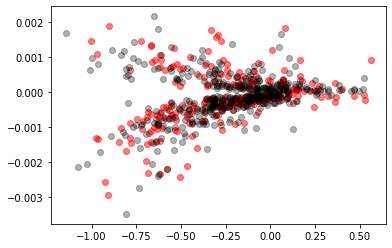

In [43]:
mask = pair_df.recip_connected
plt.plot(pair_df[mask].stp_induction_50hz, pair_df[mask].psp_amplitude, color=(1, 0, 0, 0.5), marker = "o", ls="")
plt.plot(pair_df[~mask].stp_induction_50hz, pair_df[~mask].psp_amplitude, color=(0, 0, 0, 0.3), marker = "o", ls="")


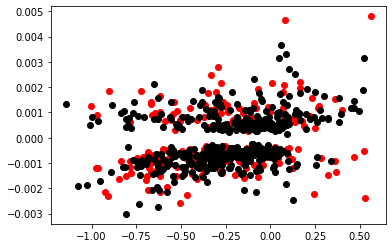

In [40]:
plt.plot(pair_df[mask].stp_induction_50hz, pair_df[mask].pulse_amp_90th_percentile, color='r', marker = "o", ls="")
plt.plot(pair_df[~mask].stp_induction_50hz, pair_df[~mask].pulse_amp_90th_percentile, color='k', marker = "o", ls="")


(array([ 0.,  0.,  5.,  4.,  6., 20., 24., 19., 18., 25., 28., 23., 15.,
        16., 11.,  6.,  5.,  1.,  3.]),
 array([-1.2       , -1.10526316, -1.01052632, -0.91578947, -0.82105263,
        -0.72631579, -0.63157895, -0.53684211, -0.44210526, -0.34736842,
        -0.25263158, -0.15789474, -0.06315789,  0.03157895,  0.12631579,
         0.22105263,  0.31578947,  0.41052632,  0.50526316,  0.6       ]),
 <a list of 19 Patch objects>)

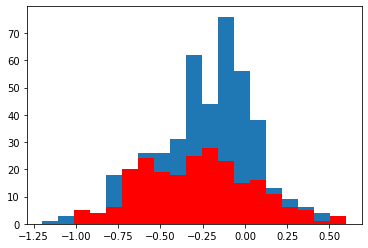

In [41]:
fig,ax = plt.subplots()
ax.hist(pair_df[~mask].stp_induction_50hz, bins=np.linspace(-1.2, 0.6, 20))
ax.hist(pair_df[mask].stp_induction_50hz, bins=np.linspace(-1.2, 0.6, 20), color='r')


In [42]:
from scipy.stats import ks_2samp
ks_2samp(pair_df[~mask].stp_induction_50hz, pair_df[mask].stp_induction_50hz)

Ks_2sampResult(statistic=0.1039306300934208, pvalue=0.0031318602046347425)

In [2]:
fig,ax = plt.subplots()
ax.hist(pair_df[~mask].psp_amplitude, bins=np.linspace(-3e-3, 3e-3, 20))
ax.hist(pair_df[mask].psp_amplitude, bins=np.linspace(-3e-3, 3e-3, 20), color=(1, 0, 0, 0.5))


NameError: name 'plt' is not defined